# Linear Regression Assignment 

### US Bike Sharing provider

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

#### The company wants to know:
- Which variables are significant in predicting the demand for shared bikes. 
- How well those variables describe the bike demands

#### What you need to do? 
- Create a linear model that describe the effect of various features on price. 
- The model should be interpretable so that the management can understand it.



## Step 1: Reading and Understanding the Data

 - import NumPy and Pandas and read the Bike Sharing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the Bike sharing Dataset and as per data dictionary column dteday reading in date format 
Bike = pd.read_csv(r"C:\Users\Pravallika.Vasupalli\Documents\Masters\Pravallika MBA\Case Studies\Linear_Regression_Assignment\download.csv",parse_dates=['dteday'])

In [4]:
# Check the head of the dataset
Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Inspect the various aspects of Bike dataset

In [5]:
Bike.shape

(730, 16)

In [6]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### Findings :-
- Bike dataframe containing  730 rows and 16 columns, Except dteday column remaining all columns are Int or Float data types

In [7]:
Bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Fixing the Rows and Columns 

Below columns contains the values in abbreviation format. Write a code in Python to convert the followings:

- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- weathersit : 
     - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
     - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
     - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
     - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- mnth : month ( 1 to 12)
- weekday : day of the week

In [8]:
# Column fixing, correcting size abbreviation. count the percentage of each size category in "Size" column.
Bike['season'].replace([1, 2, 3, 4],["spring","summer","fall","winter"],inplace=True)

In [9]:
Bike.weekday.value_counts(normalize=True)

weekday
6    0.143836
0    0.143836
1    0.143836
2    0.142466
4    0.142466
5    0.142466
3    0.141096
Name: proportion, dtype: float64

In [10]:
Bike['weathersit'].replace([1, 2, 3, 4],["Clear","Mist_Cloudy","Light_Snow_Rain","Heavy_Snow_Rain"],inplace=True)

In [11]:
Bike['mnth'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                     ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],inplace=True)

In [12]:
Bike['weekday'].replace([0, 1, 2, 3, 4, 5, 6],
                     ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"],inplace=True)

In [13]:
# Checking datatype 
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


## Step 2 : Data Visualisation 
### Perform EDA to understand various variables. 
#### Checking Missing values in the Bike dataframe

In [14]:
# Percenateg of missing values in each column 
round(100*(Bike.isnull().sum()/len(Bike.index)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [15]:
# Count of null values in each row 
Bike.isnull().sum(axis=1).sort_values(ascending=False).head()

0      0
479    0
481    0
482    0
483    0
dtype: int64

#### Findings: - Found that there were no missing/null values present in columns or rows.

### Dropping  the Redundant/Unnecessary Columns from Bike dataframe and Create new Dataframe.
- By looking at the data dictionary below 4 variable are unnecessary columns in the analysis
    - instant - This column is a record index
    - dteday - Dataframe already have year and month columns, hence dropping the date column
    - casual and registered - Both these are different type of bike booking category, our object is to predict the total count of bike booking. 

In [16]:
Bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [17]:
Bike_DF = Bike[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp',
                   'atemp', 'hum', 'windspeed','cnt']]
Bike_DF.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### For numerical columns check for outliers

In [18]:
# Checking outliers for numerical data
Bike_DF.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


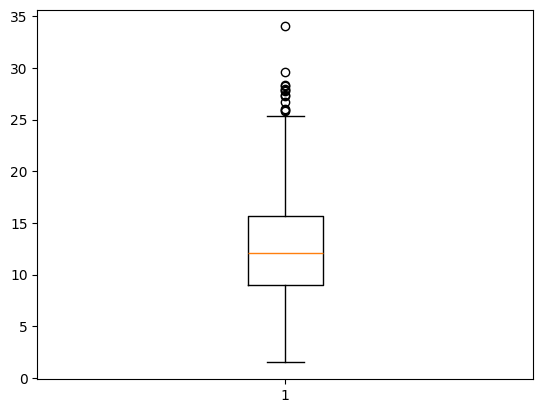

skewness : 0.6763140387852972


0.01     3.548993
0.50    12.125325
0.75    15.625589
0.80    16.639785
0.90    19.833997
0.95    22.999988
0.99    27.380948
1.00    34.000021
Name: windspeed, dtype: float64

In [19]:
# Identifying outlier in windspeed column 
plt.boxplot(Bike_DF['windspeed'])
plt.show()
print('skewness :', Bike_DF['windspeed'].skew())
Bike_DF.windspeed.quantile([0.01,0.50,0.75,0.8,0.90,0.95,0.99,1])

### Findings :
    Above Box plot output clearly states one value deviated from the main data distribution, it indicates there is  
    presence of outliers. But the data is distributed normally, even Skewness value is within the accepted range, it is < 1
    (actual value 0.68) and difference between 95, 99 and 100 percentile is minimal.

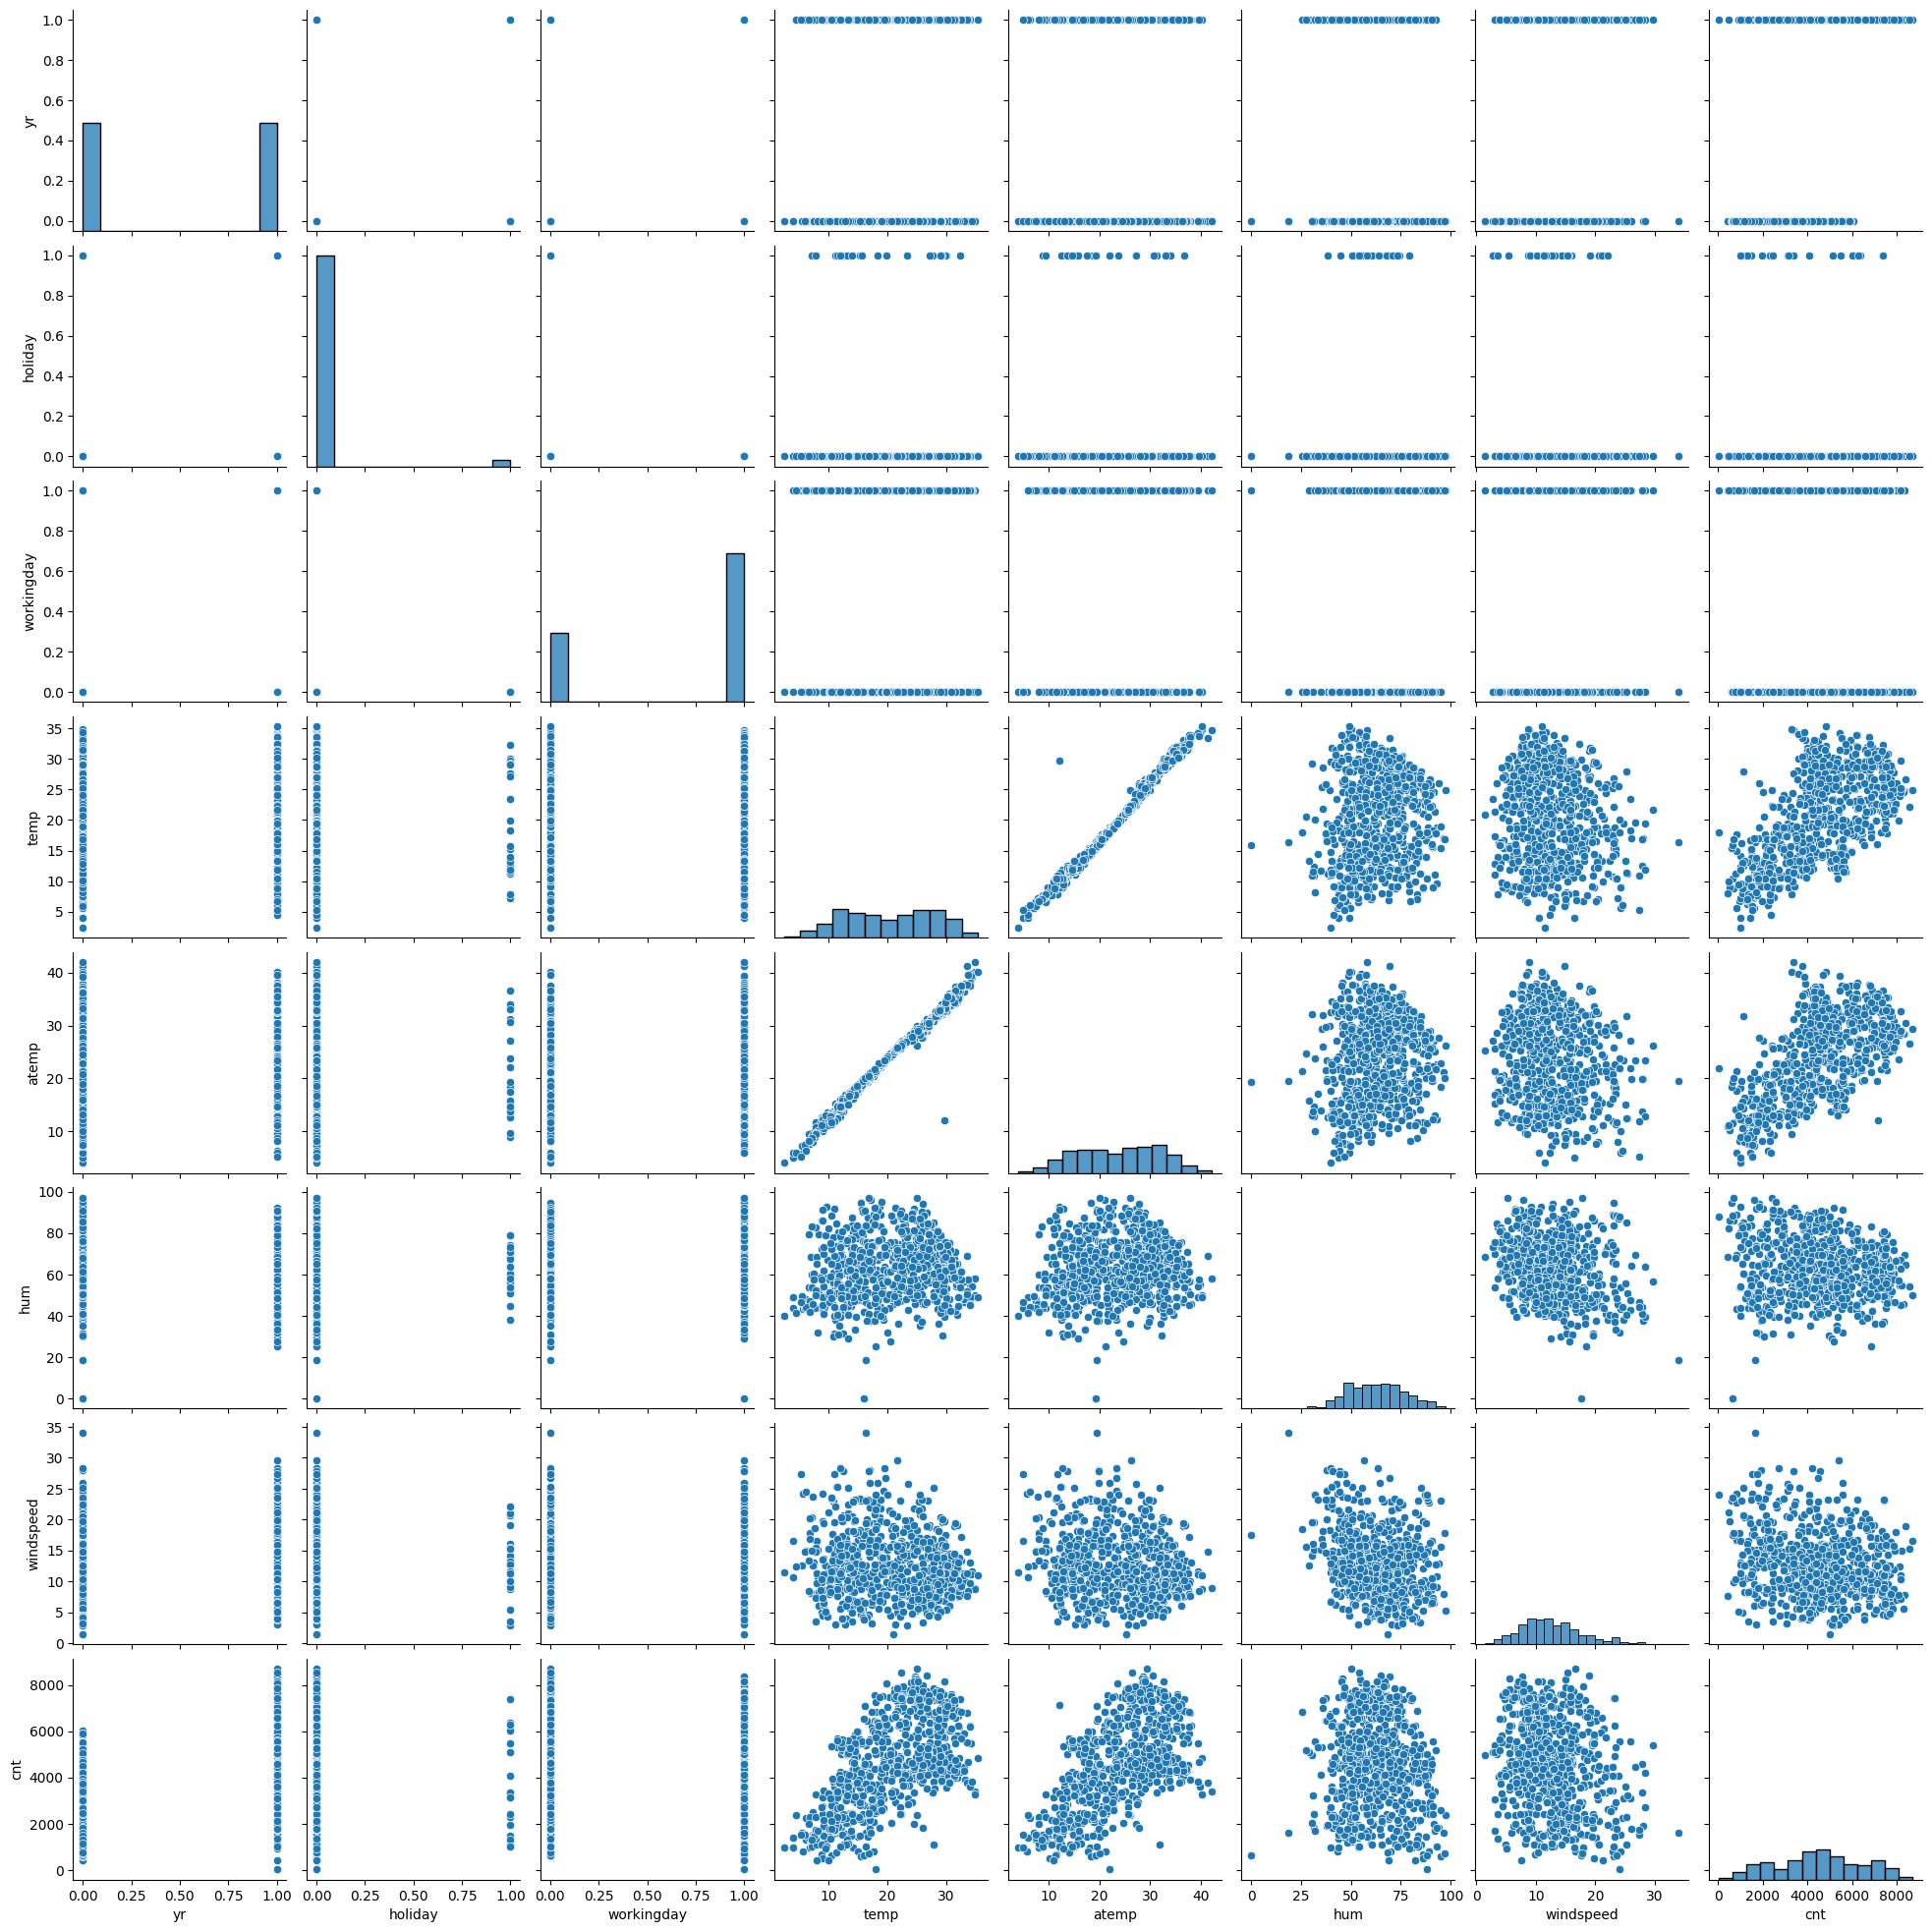

In [20]:
sns.pairplot(Bike_DF)
plt.show()

In [21]:
Bike_DF1 = Bike_DF[[ 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed','cnt']]
Bike_DF1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


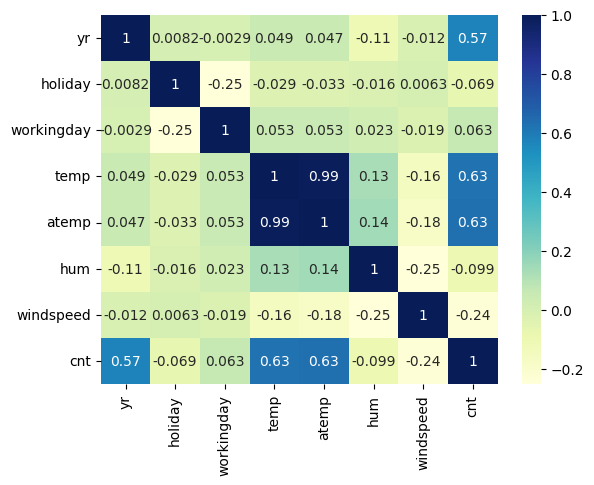

In [22]:
sns.heatmap(Bike_DF1.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Findings :
    By Looking at the scatter plot and heatmap we conclude that temp and atemp highly correlated with cnt. 
    temp and atemp also highly correlated, will keep actual tempearature for analyis purpose and dropping atemp(adjusted)   

#### Visualising Categorical Variables

There are a few categorical variables as well. Let's make a boxplot for some of these variables.

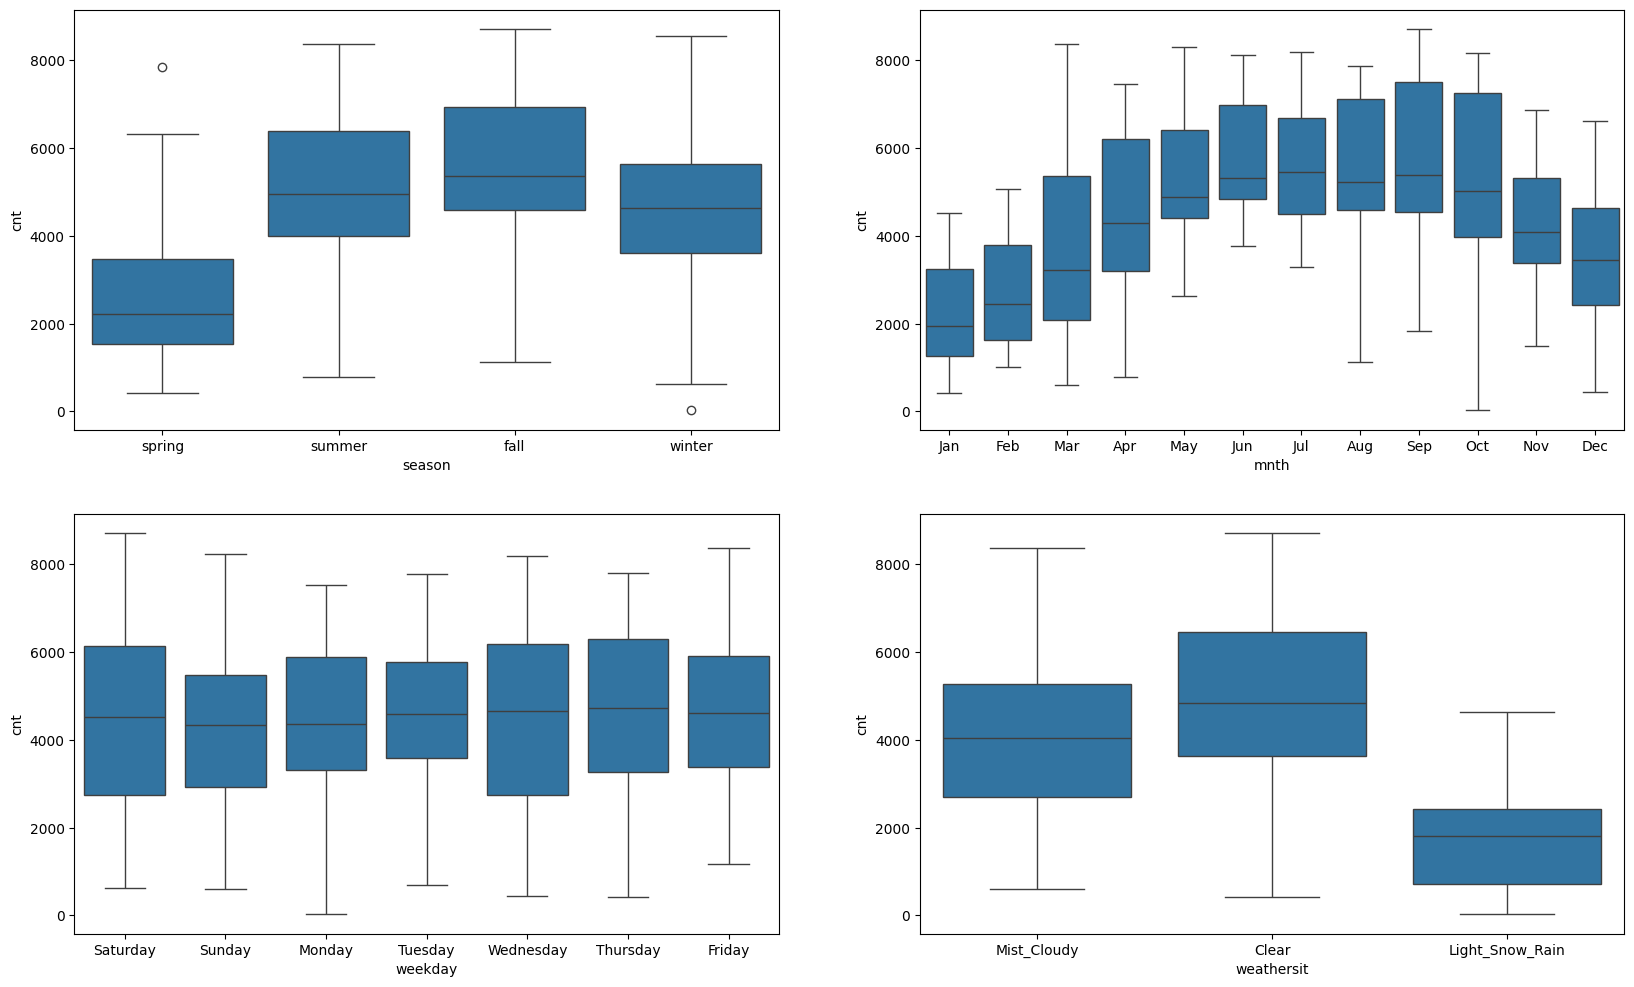

In [23]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike_DF)
plt.subplot(2,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bike_DF)
plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike_DF)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike_DF)
plt.show()

## Data Preparation
### Create dummy variables for all the categorical features:
    We have 4 categorical variables, need to creating dummy variables and convert these levels into integer as well.  


In [24]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_df'
season_df = pd.get_dummies(Bike_DF['season'])

In [25]:
# Check what the dataset 'season_df' looks like
season_df.head()

,fall,spring,summer,winter
0,False,True,False,False
1,False,True,False,False
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False


In [26]:
# Let's drop the first column from season_df using 'drop_first = True'

season_df = pd.get_dummies(Bike_DF['season'], drop_first = True)

In [27]:
season_df.head()

,spring,summer,winter
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


### Instead of creating dummy variables separately for each categorical variable will use pd.getdummies() to create all variables in single step and dropping the original variable which dummy variable created and first dummy variable for each set of dummy variables created.

In [28]:
# Creating dummy variable for all categorical variable and dropping original and first dummy variable from each set

Bike_DF = pd.get_dummies(Bike_DF, drop_first=True) 

In [29]:
# Checking the changes in Dataframe
Bike_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   atemp                       730 non-null    float64
 5   hum                         730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   cnt                         730 non-null    int64  
 8   season_spring               730 non-null    bool   
 9   season_summer               730 non-null    bool   
 10  season_winter               730 non-null    bool   
 11  mnth_Aug                    730 non-null    bool   
 12  mnth_Dec                    730 non-null    bool   
 13  mnth_Feb                    730 non

In [30]:
Bike_DF.shape

(730, 30)

## Step 4 : Divide the data to train and test

In [31]:
# Splitting the data into Train and Test in (70,30) ratio using Sklearn train_test_split method

from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(Bike_DF, train_size = 0.7, test_size = 0.3, random_state = 333)

In [32]:
# Verifying shape and info of the Train data 

print(df_train.shape)
print(df_train.info())


(510, 30)
<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          510 non-null    int64  
 1   holiday                     510 non-null    int64  
 2   workingday                  510 non-null    int64  
 3   temp                        510 non-null    float64
 4   atemp                       510 non-null    float64
 5   hum                         510 non-null    float64
 6   windspeed                   510 non-null    float64
 7   cnt                         510 non-null    int64  
 8   season_spring               510 non-null    bool   
 9   season_summer               510 non-null    bool   
 10  season_winter               510 non-null    bool   
 11  mnth_Aug                    510 non-null    bool   
 12  mnth_Dec                    510 non-null    bool   
 13  mnth_Feb                    

In [33]:
# Verifying shape and info of the Test data 

print(df_test.shape)
print(df_test.info())

(219, 30)
<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          219 non-null    int64  
 1   holiday                     219 non-null    int64  
 2   workingday                  219 non-null    int64  
 3   temp                        219 non-null    float64
 4   atemp                       219 non-null    float64
 5   hum                         219 non-null    float64
 6   windspeed                   219 non-null    float64
 7   cnt                         219 non-null    int64  
 8   season_spring               219 non-null    bool   
 9   season_summer               219 non-null    bool   
 10  season_winter               219 non-null    bool   
 11  mnth_Aug                    219 non-null    bool   
 12  mnth_Dec                    219 non-null    bool   
 13  mnth_Feb                    2

## Step 5: Perform scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [35]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,False,True,...,False,False,False,False,True,False,False,False,False,False
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,False,False,...,True,False,False,True,False,False,False,False,False,False
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,False,False,...,False,False,True,False,False,False,False,False,False,False
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,False,False,...,False,False,False,False,True,False,False,False,False,True
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,True,False,...,False,False,False,False,True,False,False,False,False,False


In [36]:
# Apply scaler() to all the columns except 'dummy' variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [37]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,False,True,...,False,False,False,False,True,False,False,False,False,False
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,False,False,...,True,False,False,True,False,False,False,False,False,False
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,False,False,...,False,False,True,False,False,False,False,False,False,False
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,False,False,...,False,False,False,False,True,False,False,False,False,True
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,True,False,...,False,False,False,False,True,False,False,False,False,False


In [38]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


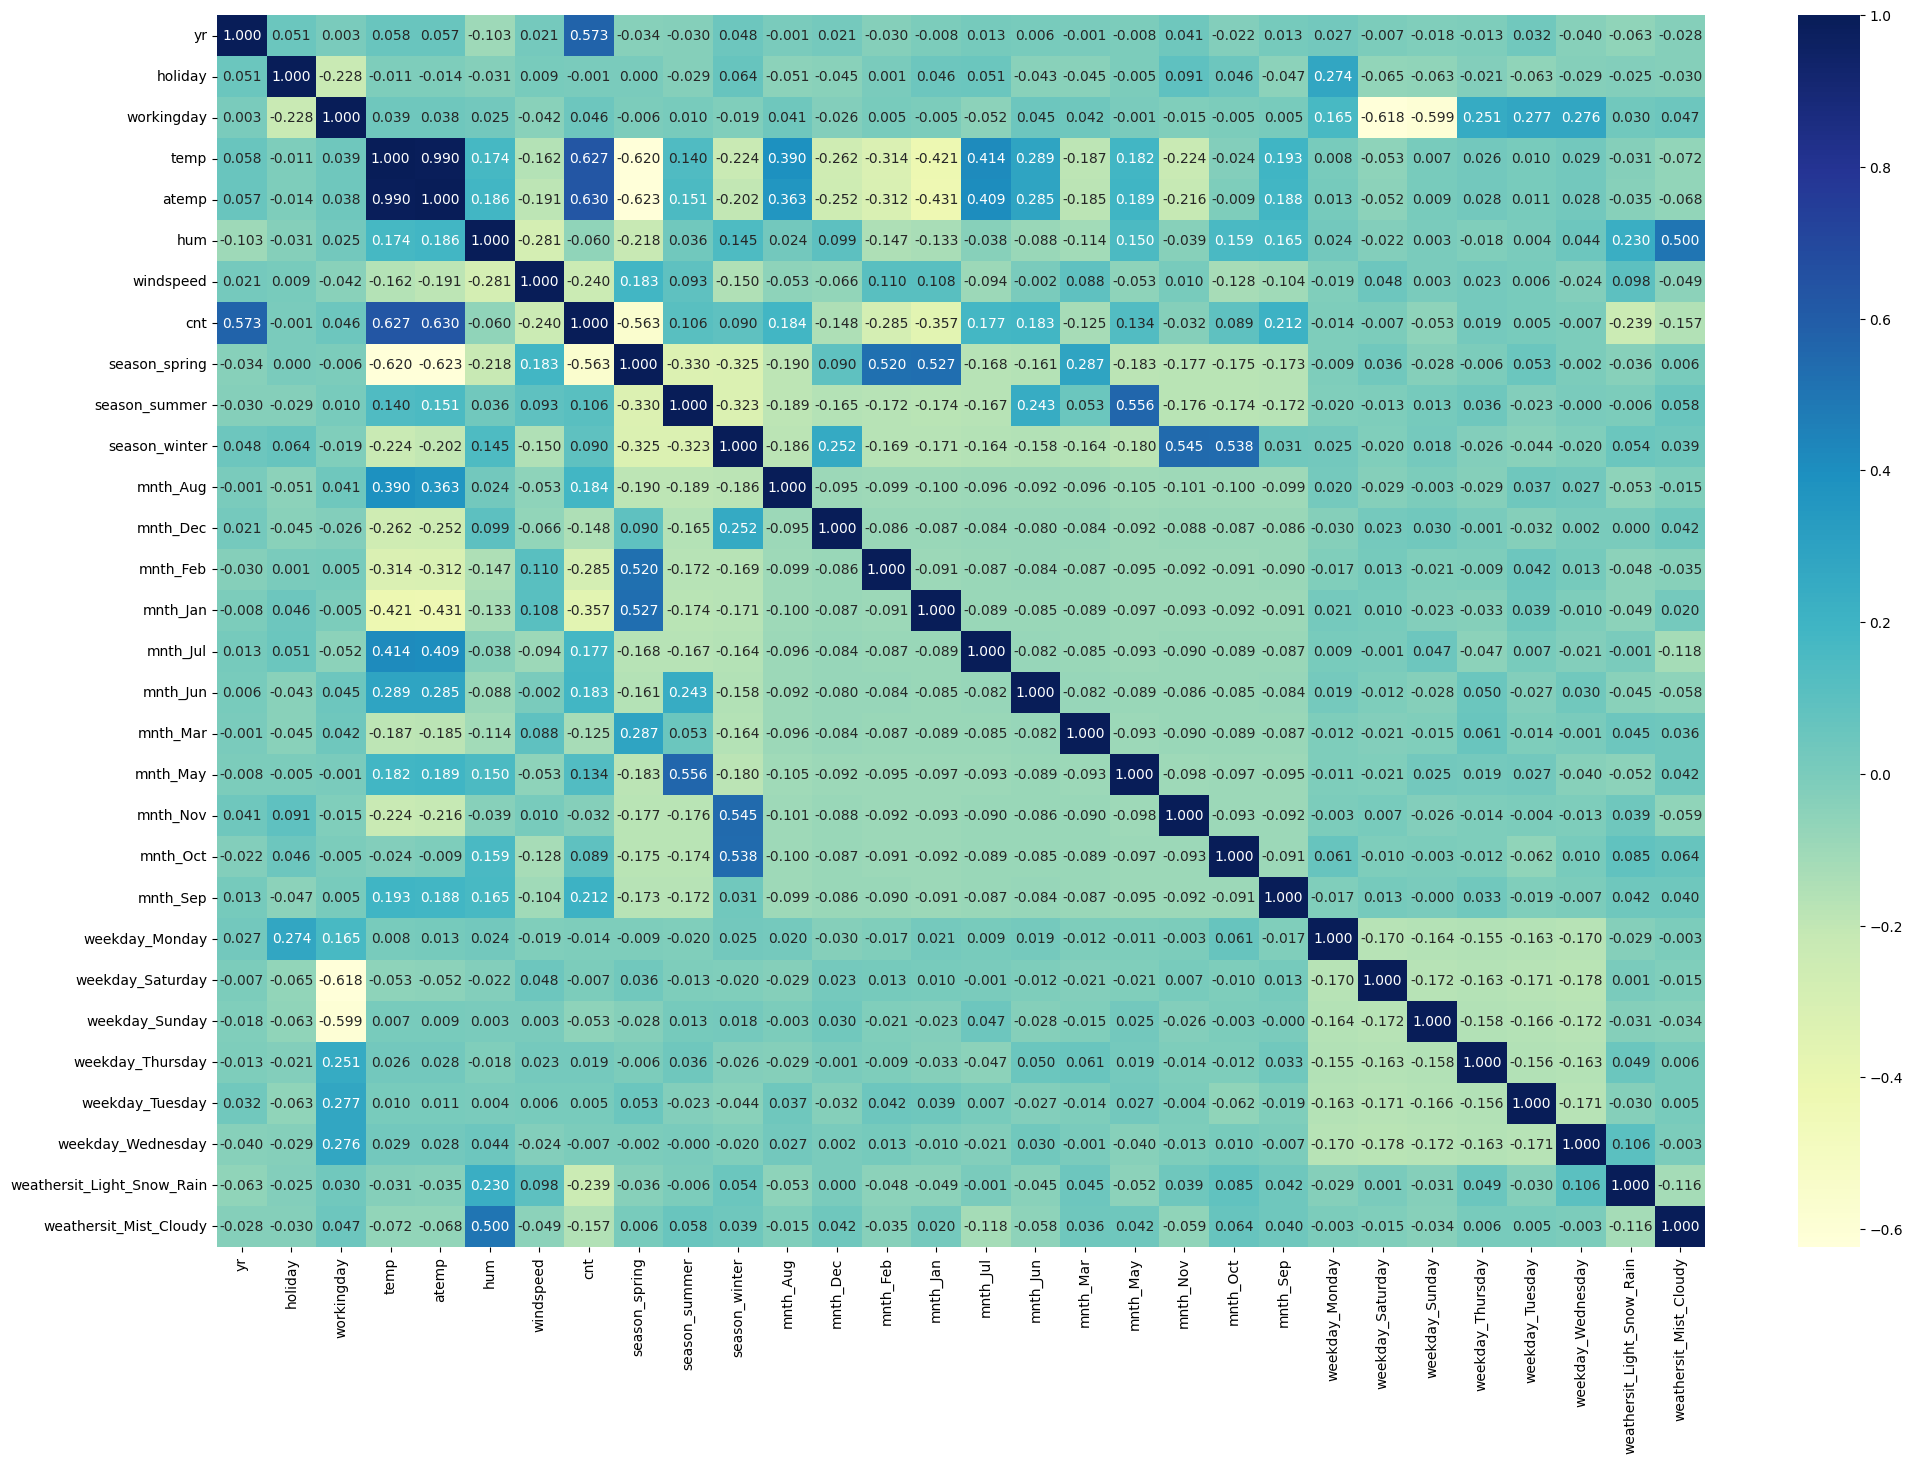

In [39]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (24, 16))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu", fmt = '.3f')
plt.show()

### Finding:
    Heatmap clearly shows the collinearity between all the varibales with Target Variable
    temp and yr are highly correlated with Target Variable(cnt)
    

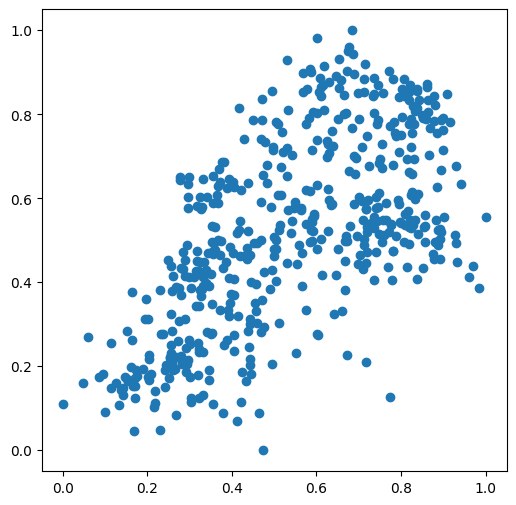

In [40]:
# temp seems to the highly correlated to cnt the most. Let's see a pairplot for temp vs cnt
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Try to fit a regression line between temp and cnt

### Dividing into X and Y sets for the model building

In [41]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

In [42]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [43]:
# Check the parameters obtained
lr.params

const    0.181283
temp     0.617230
dtype: float64

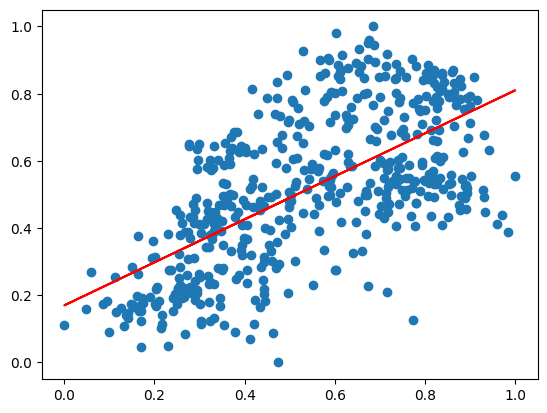

In [44]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.170 + 0.640*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [45]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     329.4
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           4.11e-57
Time:                        22:33:46   Log-Likelihood:                 166.67
No. Observations:                 510   AIC:                            -329.3
Df Residuals:                     508   BIC:                            -320.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1813      0.020      9.083      0.0

### Adding another variable

The R-squared value obtained is `0.393`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `yr`.

In [46]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'yr']]

In [47]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.077053
temp     0.586308
yr       0.240966
dtype: float64

In [48]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     542.5
Date:                Wed, 19 Jun 2024   Prob (F-statistic):          1.08e-126
Time:                        22:34:20   Log-Likelihood:                 330.99
No. Observations:                 510   AIC:                            -656.0
Df Residuals:                     507   BIC:                            -643.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0771      0.015      5.046      0.0

##### We have clearly improved the model as the value of adjusted R-squared as its value has gone up to `0.680` from `0.392`.

### Note : Bike_DF having more than 20 varibales, adding one by one variable taking long process and Instead of that will proceed with RFE Recursive feature elimination. We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE.


## RFE(Recursive feature elimination): 



In [49]:
# Importing RFE and LinearRegression 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) 
# The mask of selected features and The feature ranking, such that ranking_[i] corresponds to the ranking position of the 
# i-th feature. 

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 11),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 4),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 9),
 ('mnth_Mar', False, 8),
 ('mnth_May', False, 13),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 7),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 14),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 15),
 ('weathersit_Light_Snow_Rain', True, 1),
 ('weathersit_Mist_Cloudy', False, 3)]

In [51]:
col = X_train.columns[rfe.support_] 
col 

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weekday_Saturday', 'weekday_Sunday', 'weathersit_Light_Snow_Rain'],
      dtype='object')

###### Adding all the feature variables to the model

In [52]:
# Creating X_test dataframe with RFE selected variables 
X_train_rfe = X_train[col] 

In [53]:
import statsmodels.api as sm
import numpy as np

# Convert data to NumPy arrays
X_train_lm = sm.add_constant(np.asarray(X_train_rfe, dtype=float))
y_train = np.asarray(y_train, dtype=float)

# Fit the OLS model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [54]:
#Build a linear model

lr_1.params

array([ 0.31290409,  0.2268939 ,  0.05274059,  0.0936573 ,  0.32282982,
        0.17716139, -0.2776817 , -0.19518368, -0.11577897,  0.06996854,
       -0.05343338, -0.04197156,  0.06346644,  0.10855016,  0.05795605,
       -0.21767444])

In [55]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     173.2
Date:                Wed, 19 Jun 2024   Prob (F-statistic):          1.93e-180
Time:                        22:35:13   Log-Likelihood:                 491.80
No. Observations:                 510   AIC:                            -953.6
Df Residuals:                     495   BIC:                            -890.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3129      0.027     11.762      0.0

In [56]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values.astype(float), i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,temp,53.26
4,atemp,51.64
2,workingday,42.23
12,weekday_Saturday,10.00
13,weekday_Sunday,9.57
7,season_spring,2.67
1,holiday,2.50
8,season_winter,2.08
10,mnth_Nov,1.53
9,mnth_Jul,1.31


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `temp` as it has a very high VIF of `53.26`. Let's go ahead and drop this variables

In [57]:
# Dropping highly correlated variables or insignificant variables

X = X_train_rfe.drop('temp', axis=1)

In [58]:
# Convert data to NumPy arrays
X = np.asarray(X, dtype=float)
y_train = np.asarray(y_train, dtype=float)

# Add a constant term to the predictors
X_train_lm = sm.add_constant(X)

# Fit the OLS model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [59]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     184.3
Date:                Wed, 19 Jun 2024   Prob (F-statistic):          2.58e-180
Time:                        22:36:06   Log-Likelihood:                 488.78
No. Observations:                 510   AIC:                            -949.6
Df Residuals:                     496   BIC:                            -890.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3161      0.027     11.839      0.0

In [60]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop the 'temp' column from the DataFrame
X = X_train_rfe.drop('temp', axis=1)

# Get the updated column names
column_names = X.columns.tolist()

# Convert the DataFrame to a NumPy array
X = X.astype(float).values

# Calculate the VIFs
vif = pd.DataFrame()
vif['Features'] = column_names
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,workingday,42.12
11,weekday_Saturday,9.98
12,weekday_Sunday,9.56
3,atemp,2.92
6,season_spring,2.61
1,holiday,2.49
7,season_winter,2.01
9,mnth_Nov,1.53
8,mnth_Jul,1.29
4,hum,1.28


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values. Such variables are insignificant and should be dropped.

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `workingday` as it has a very high VIF of `42.12`. Let's go ahead and drop this variables

Hence, `workingday` variable isn't of much use and should be dropped.

In [61]:
# Dropping highly correlated variables and insignificant variables
X = X_train_rfe.drop(['temp','workingday'], axis=1)

In [62]:
# Convert data to NumPy arrays
X = np.asarray(X, dtype=float)
y_train = np.asarray(y_train, dtype=float)

# Add a constant term to the predictors
X_train_lm = sm.add_constant(X)

# Fit the OLS model
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [63]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     184.3
Date:                Wed, 19 Jun 2024   Prob (F-statistic):          2.58e-180
Time:                        22:36:25   Log-Likelihood:                 488.78
No. Observations:                 510   AIC:                            -949.6
Df Residuals:                     496   BIC:                            -890.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4105      0.033     12.538      0.0

In [64]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop the 'atemp' column from the DataFrame
X = X_train_rfe.drop(['temp','workingday'], axis=1)

# Get the updated column names
column_names = X.columns.tolist()

# Convert the DataFrame to a NumPy array
X = X.astype(float).values

# Calculate the VIFs
vif = pd.DataFrame()
vif['Features'] = column_names
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,hum,14.96
2,atemp,13.08
4,windspeed,4.93
6,season_winter,2.40
5,season_spring,2.37
0,yr,2.04
8,mnth_Nov,1.64
7,mnth_Jul,1.40
10,weekday_Saturday,1.22
11,weekday_Sunday,1.21


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values. Such variables are insignificant and should be dropped.

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `hum` as it has a very high VIF of `14.96`. Let's go ahead and drop this variables

Hence, `hum` variable isn't of much use and should be dropped.

In [65]:
# Dropping highly correlated variables and insignificant variables
X = X_train_rfe.drop(['hum','temp','workingday'], axis=1)

In [66]:
# Convert data to NumPy arrays
X = np.asarray(X, dtype=float)
y_train = np.asarray(y_train, dtype=float)

# Add a constant term to the predictors
X_train_lm = sm.add_constant(X)

# Fit the OLS model
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [67]:
# Print the summary of the model

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     167.1
Date:                Wed, 19 Jun 2024   Prob (F-statistic):          9.84e-166
Time:                        22:36:44   Log-Likelihood:                 451.42
No. Observations:                 510   AIC:                            -876.8
Df Residuals:                     497   BIC:                            -821.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2257      0.027      8.329      0.0

In [68]:
# Drop the columns from the DataFrame
X = X_train_rfe.drop(['hum','temp','workingday'], axis=1)

# Get the updated column names
column_names = X.columns.tolist()

# Convert the DataFrame to a NumPy array
X = X.astype(float).values

# Calculate the VIFs
vif = pd.DataFrame()
vif['Features'] = column_names
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,windspeed,4.86
2,atemp,4.83
0,yr,2.03
5,season_winter,1.92
4,season_spring,1.70
7,mnth_Nov,1.64
6,mnth_Jul,1.35
9,weekday_Saturday,1.22
10,weekday_Sunday,1.21
8,mnth_Sep,1.20


In [69]:
X = X_train_rfe.drop(['hum','temp','workingday'], axis=1)

# Get the updated column names
column_names = X.columns.tolist()
column_names

['yr',
 'holiday',
 'atemp',
 'windspeed',
 'season_spring',
 'season_winter',
 'mnth_Jul',
 'mnth_Nov',
 'mnth_Sep',
 'weekday_Saturday',
 'weekday_Sunday',
 'weathersit_Light_Snow_Rain']

### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `weekday_Saturday` as it has a high p-value of `0.283`. Let's go ahead and drop this variables

In [70]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('weekday_Saturday', axis=1)

In [71]:
# Convert data to NumPy arrays
X = np.asarray(X, dtype=float)
y_train = np.asarray(y_train, dtype=float)

# Add a constant term to the predictors
X_train_lm = sm.add_constant(X)

# Fit the OLS model
lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [175]:
# Print the summary of the model

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     182.2
Date:                Wed, 19 Jun 2024   Prob (F-statistic):          1.26e-166
Time:                        21:57:43   Log-Likelihood:                 450.82
No. Observations:                 510   AIC:                            -877.6
Df Residuals:                     498   BIC:                            -826.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2290      0.027      8.500      0.0

In [72]:
# Drop the columns from the DataFrame
X = X_train_rfe.drop(['weekday_Saturday','hum','temp','workingday'], axis=1)

# Get the updated column names
column_names = X.columns.tolist()

# Convert the DataFrame to a NumPy array
X = X.astype(float).values

# Calculate the VIFs
vif = pd.DataFrame()
vif['Features'] = column_names
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,windspeed,4.81
2,atemp,4.79
0,yr,2.03
5,season_winter,1.92
4,season_spring,1.69
7,mnth_Nov,1.64
6,mnth_Jul,1.35
8,mnth_Sep,1.19
9,weekday_Sunday,1.17
1,holiday,1.05


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `holiday` as it has a high p-value of `0.185`. Let's go ahead and drop this variables

In [73]:
# Dropping highly correlated variables and insignificant variables
X = X_train_rfe.drop(['holiday','hum','temp','workingday','weekday_Saturday'], axis=1)


In [74]:
# Convert data to NumPy arrays
X = np.asarray(X, dtype=float)
y_train = np.asarray(y_train, dtype=float)

# Add a constant term to the predictors
X_train_lm = sm.add_constant(X)

# Fit the OLS model
lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [181]:
# Print the summary of the model

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     199.8
Date:                Wed, 19 Jun 2024   Prob (F-statistic):          2.36e-167
Time:                        22:04:43   Log-Likelihood:                 449.80
No. Observations:                 510   AIC:                            -877.6
Df Residuals:                     499   BIC:                            -831.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2241      0.027      8.379      0.0

In [75]:
# Drop the columns from the DataFrame
X = X_train_rfe.drop(['holiday','hum','temp','workingday','weekday_Saturday'], axis=1)

# Get the updated column names
column_names = X.columns.tolist()

# Convert the DataFrame to a NumPy array
X = X.astype(float).values

# Calculate the VIFs
vif = pd.DataFrame()
vif['Features'] = column_names
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,windspeed,4.81
1,atemp,4.79
0,yr,2.03
4,season_winter,1.92
3,season_spring,1.68
6,mnth_Nov,1.63
5,mnth_Jul,1.34
7,mnth_Sep,1.19
8,weekday_Sunday,1.17
9,weathersit_Light_Snow_Rain,1.05


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `mnth_Nov` as it has a high p-value of `0.087`. Let's go ahead and drop this variables

In [78]:
# Dropping highly correlated variables and insignificant variables

X = X_train_rfe.drop(['mnth_Nov','mnth_Nov','hum','temp','workingday','weekday_Saturday'], axis=1)


In [79]:
# Convert data to NumPy arrays
X = np.asarray(X, dtype=float)
y_train = np.asarray(y_train, dtype=float)

# Add a constant term to the predictors
X_train_lm = sm.add_constant(X)

# Fit the OLS model
lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [80]:
# Print the summary of the model

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     199.8
Date:                Wed, 19 Jun 2024   Prob (F-statistic):          2.36e-167
Time:                        22:43:54   Log-Likelihood:                 449.80
No. Observations:                 510   AIC:                            -877.6
Df Residuals:                     499   BIC:                            -831.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2241      0.027      8.379      0.0

In [81]:
# Drop the columns from the DataFrame
X = X_train_rfe.drop(['atemp','mnth_Nov','hum','temp','workingday','weekday_Saturday'], axis=1)

# Get the updated column names
column_names = X.columns.tolist()

# Convert the DataFrame to a NumPy array
X = X.astype(float).values

# Calculate the VIFs
vif = pd.DataFrame()
vif['Features'] = column_names
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,windspeed,2.60
0,yr,1.85
3,season_spring,1.54
4,season_winter,1.37
7,weekday_Sunday,1.16
5,mnth_Jul,1.12
6,mnth_Sep,1.09
8,weathersit_Light_Snow_Rain,1.05
1,holiday,1.04


#### Dropping holiday having p value 0.159

In [84]:
# Dropping highly correlated variables and insignificant variables

X = X_train_rfe.drop(['holiday','atemp','mnth_Nov','hum','temp','workingday','weekday_Saturday'], axis=1)
# Convert data to NumPy arrays
X = np.asarray(X, dtype=float)
y_train = np.asarray(y_train, dtype=float)

# Add a constant term to the predictors
X_train_lm = sm.add_constant(X)

# Fit the OLS model
lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [85]:
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     164.9
Date:                Wed, 19 Jun 2024   Prob (F-statistic):          4.52e-135
Time:                        22:46:16   Log-Likelihood:                 368.21
No. Observations:                 510   AIC:                            -718.4
Df Residuals:                     501   BIC:                            -680.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5405      0.016     34.648      0.0

In [86]:
# Drop the columns from the DataFrame
X = X_train_rfe.drop(['holiday','atemp','mnth_Nov','hum','temp','workingday','weekday_Saturday'], axis=1)

# Get the updated column names
column_names = X.columns.tolist()

# Convert the DataFrame to a NumPy array
X = X.astype(float).values

# Calculate the VIFs
vif = pd.DataFrame()
vif['Features'] = column_names
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,windspeed,2.60
0,yr,1.84
2,season_spring,1.54
3,season_winter,1.35
6,weekday_Sunday,1.15
4,mnth_Jul,1.12
5,mnth_Sep,1.09
7,weathersit_Light_Snow_Rain,1.05


#### Findings:
    This model looks good, the VIFs and p-values both are within an acceptable range and it seems to be very low multicollinearity and significant p-values between the all predictor variables.

#### Final Model Coefficients :

Features	VIF
1	windspeed	                2.60
0	yr          	            1.84
2	season_spring	            1.54
3	season_winter	            1.35
6	weekday_Sunday	            1.15
4	mnth_Jul	                1.12
5	mnth_Sep	                1.09
7	weathersit_Light_Snow_Rain	1.05
#### F Statistics:  
       
    F-statistic:  164.9
    Prob (F-statistic): 4.52e-135
    
    F-statistic value(164.9) greater than 1 and P-value looks '~0.000', it clearly indicates the model is more significant.
    
    

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [87]:
y_train_cnt = lr_8.predict(X_train_lm)

Text(0.5, 0, 'Errors')

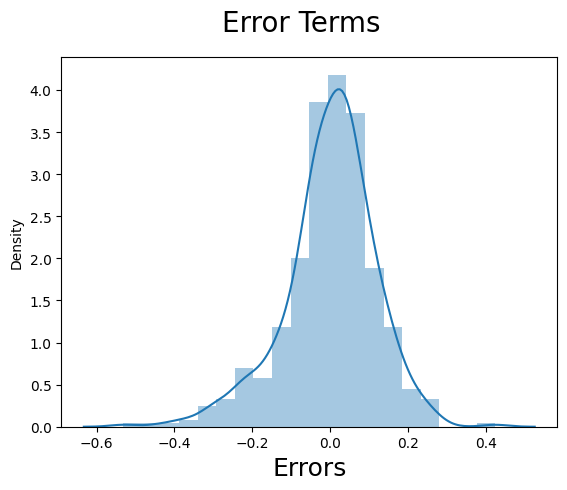

In [88]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Findings:
    From the above histogram it clearly states that residuals are normally distributed.

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. Sixth model.

In [89]:
# Apply scaler() to all the columns except 'dummy' variables

num_vars = ['temp','atemp','hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.538085,0.525222,0.509481,0.364194,0.510354
std,0.501098,0.198967,0.465607,0.244673,0.225589,0.202460,0.212372,0.242342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.330429,0.337251,0.355007,0.212433,0.340474
50%,0.000000,0.000000,1.000000,0.544938,0.547913,0.509158,0.339573,0.517936
75%,1.000000,0.000000,1.000000,0.751431,0.715419,0.650183,0.482659,0.684434
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [90]:
y_test = df_test.pop('cnt')
X_test = df_test

In [91]:
# Adding constant variable to test dataframe
X_test_m7 = sm.add_constant(X_test)

In [95]:
# Creating X_test_m dataframe by keeping Model 6 variables.
X = X_train_rfe.drop(['holiday','atemp','mnth_Nov','hum','temp','workingday','weekday_Saturday'], axis=1)
column_names = X.columns.tolist()
X = X.astype(float).values
Col_L7=column_names 
X_test_m=X_test_m7[column_names]


In [96]:
X_test_m7 = sm.add_constant(X_test_m) 
X_test_m7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       219 non-null    float64
 1   yr                          219 non-null    int64  
 2   windspeed                   219 non-null    float64
 3   season_spring               219 non-null    bool   
 4   season_winter               219 non-null    bool   
 5   mnth_Jul                    219 non-null    bool   
 6   mnth_Sep                    219 non-null    bool   
 7   weekday_Sunday              219 non-null    bool   
 8   weathersit_Light_Snow_Rain  219 non-null    bool   
dtypes: bool(6), float64(2), int64(1)
memory usage: 8.1 KB


In [97]:
# Making predictions using the Sixth model

y_pred_m7 = lr_8.predict(X_test_m7)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

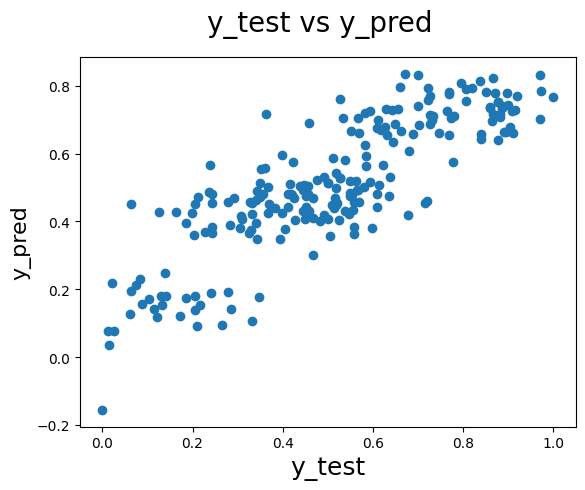

In [98]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m7)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

### Check the Adjusted R-Square for both test and train data
#### R^2 Value for TEST


In [99]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred_m7) 

0.7081787981890661

#### Adjusted R^2 Value for TEST

In [100]:
r2 = 0.7081787981890661 
# n is number of rows in X and P is number of columns(predictors)
n = X_test_m.shape[0] 
p = X_test_m.shape[1]
# Calculating Adjusted R-squared using the formula 
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1) 
adjusted_r2 

0.6970618000248401

### R stattistics comparison between train and test

Train R^2 ==> 0.725
Train Adjusted R^2 ==> 0.720

Test R^2 ==> 0.708
Test Adjusted R^2 ==> 0.697


### Final Conclusion: 
As per our final Model, the top 3 predictor variables that influences the bike booking are: --- - Monthly_Sep	 - A coefficient value of ‘0.0950’ indicated that a unit increase in Monthly_Sep variable increases the bike hire numbers by 0.0950 units. - weathersit_Light_Snow_Rain (Light snow Rain) - A coefficient value of ‘-0.3004’ indicated that, w.r.t Weathersit, a unit increase in weathersit_Light_Snow_Rain variable decreases the bike hire numbers by 0.3004 units. - Year (yr) - A coefficient value of ‘0.2445’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2445 units. 

SO IT IS RECOMMENDED TO GIVE THESE VARIABLES UTMOST IMPORTANCE WHILE PLANNING, TO ACHIEVE MAXIMUM BOOKING. 
